In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings 
warnings.simplefilter('ignore')

In [255]:
data=pd.read_excel("./py project.xlsx",thousands=',')
data=data.replace(",",'')
data[['size','room_num','bathroom_num','price']]=data[['size','room_num','bathroom_num','price']].astype(int)

In [256]:
def outlier_detection(data):
    plt.figure(figsize=(10,8),dpi=80)
    d= data.boxplot(return_type='dict')
    plt.xticks(rotation=60)
    plt.show()
    lst=list(data.columns)
    for v in lst:
        try:
            value = d['fliers'][lst.index(v)].get_ydata()
        except:pass
        for outlier in value:
            data = data[data.loc[:,v] != outlier]
        
    return data

In [257]:
df1=data.iloc[num_df.index]

In [258]:
df1.index=range(len(df1))
from sklearn.preprocessing import LabelEncoder
df1['address']=LabelEncoder().fit_transform(df1['address'])

In [259]:
df1['type']=LabelEncoder().fit_transform(df1['type'])

In [260]:
df1['district']=LabelEncoder().fit_transform(df1['district'])

# Mutiple Regression

In [261]:
#Calculate the one-dimensional correlation coefficients between the data
#using data after feature engineering and outlier processing data(df2)
corr=df2.corr()
print(corr)

               address      type      size  room_num  bathroom_num     price  \
address       1.000000 -0.114723 -0.043593 -0.034249     -0.067711 -0.001006   
type         -0.114723  1.000000 -0.143796  0.036826     -0.076529 -0.352403   
size         -0.043593 -0.143796  1.000000  0.706696      0.759337  0.854295   
room_num     -0.034249  0.036826  0.706696  1.000000      0.688174  0.524335   
bathroom_num -0.067711 -0.076529  0.759337  0.688174      1.000000  0.669677   
price        -0.001006 -0.352403  0.854295  0.524335      0.669677  1.000000   
longitude     0.125940  0.002055 -0.005834  0.012866      0.002196  0.075087   
latitude     -0.049308  0.230951 -0.067350  0.061751     -0.005094 -0.207190   
long_la       0.127363 -0.087584  0.004967 -0.028945     -0.015605  0.093637   
district      0.061489  0.075985  0.025261  0.060698      0.039949 -0.066065   

              longitude  latitude   long_la  district  
address        0.125940 -0.049308  0.127363  0.061489  
type   

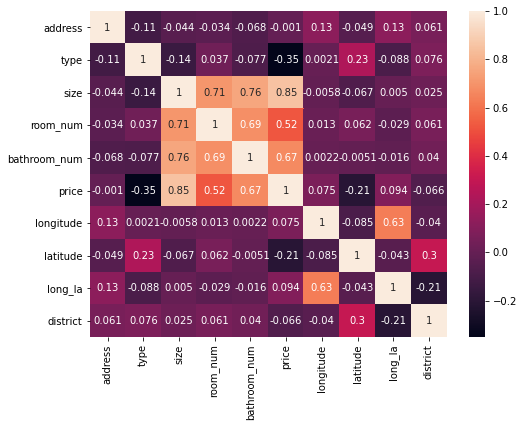

In [262]:
#Visualizing the cor
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.show()

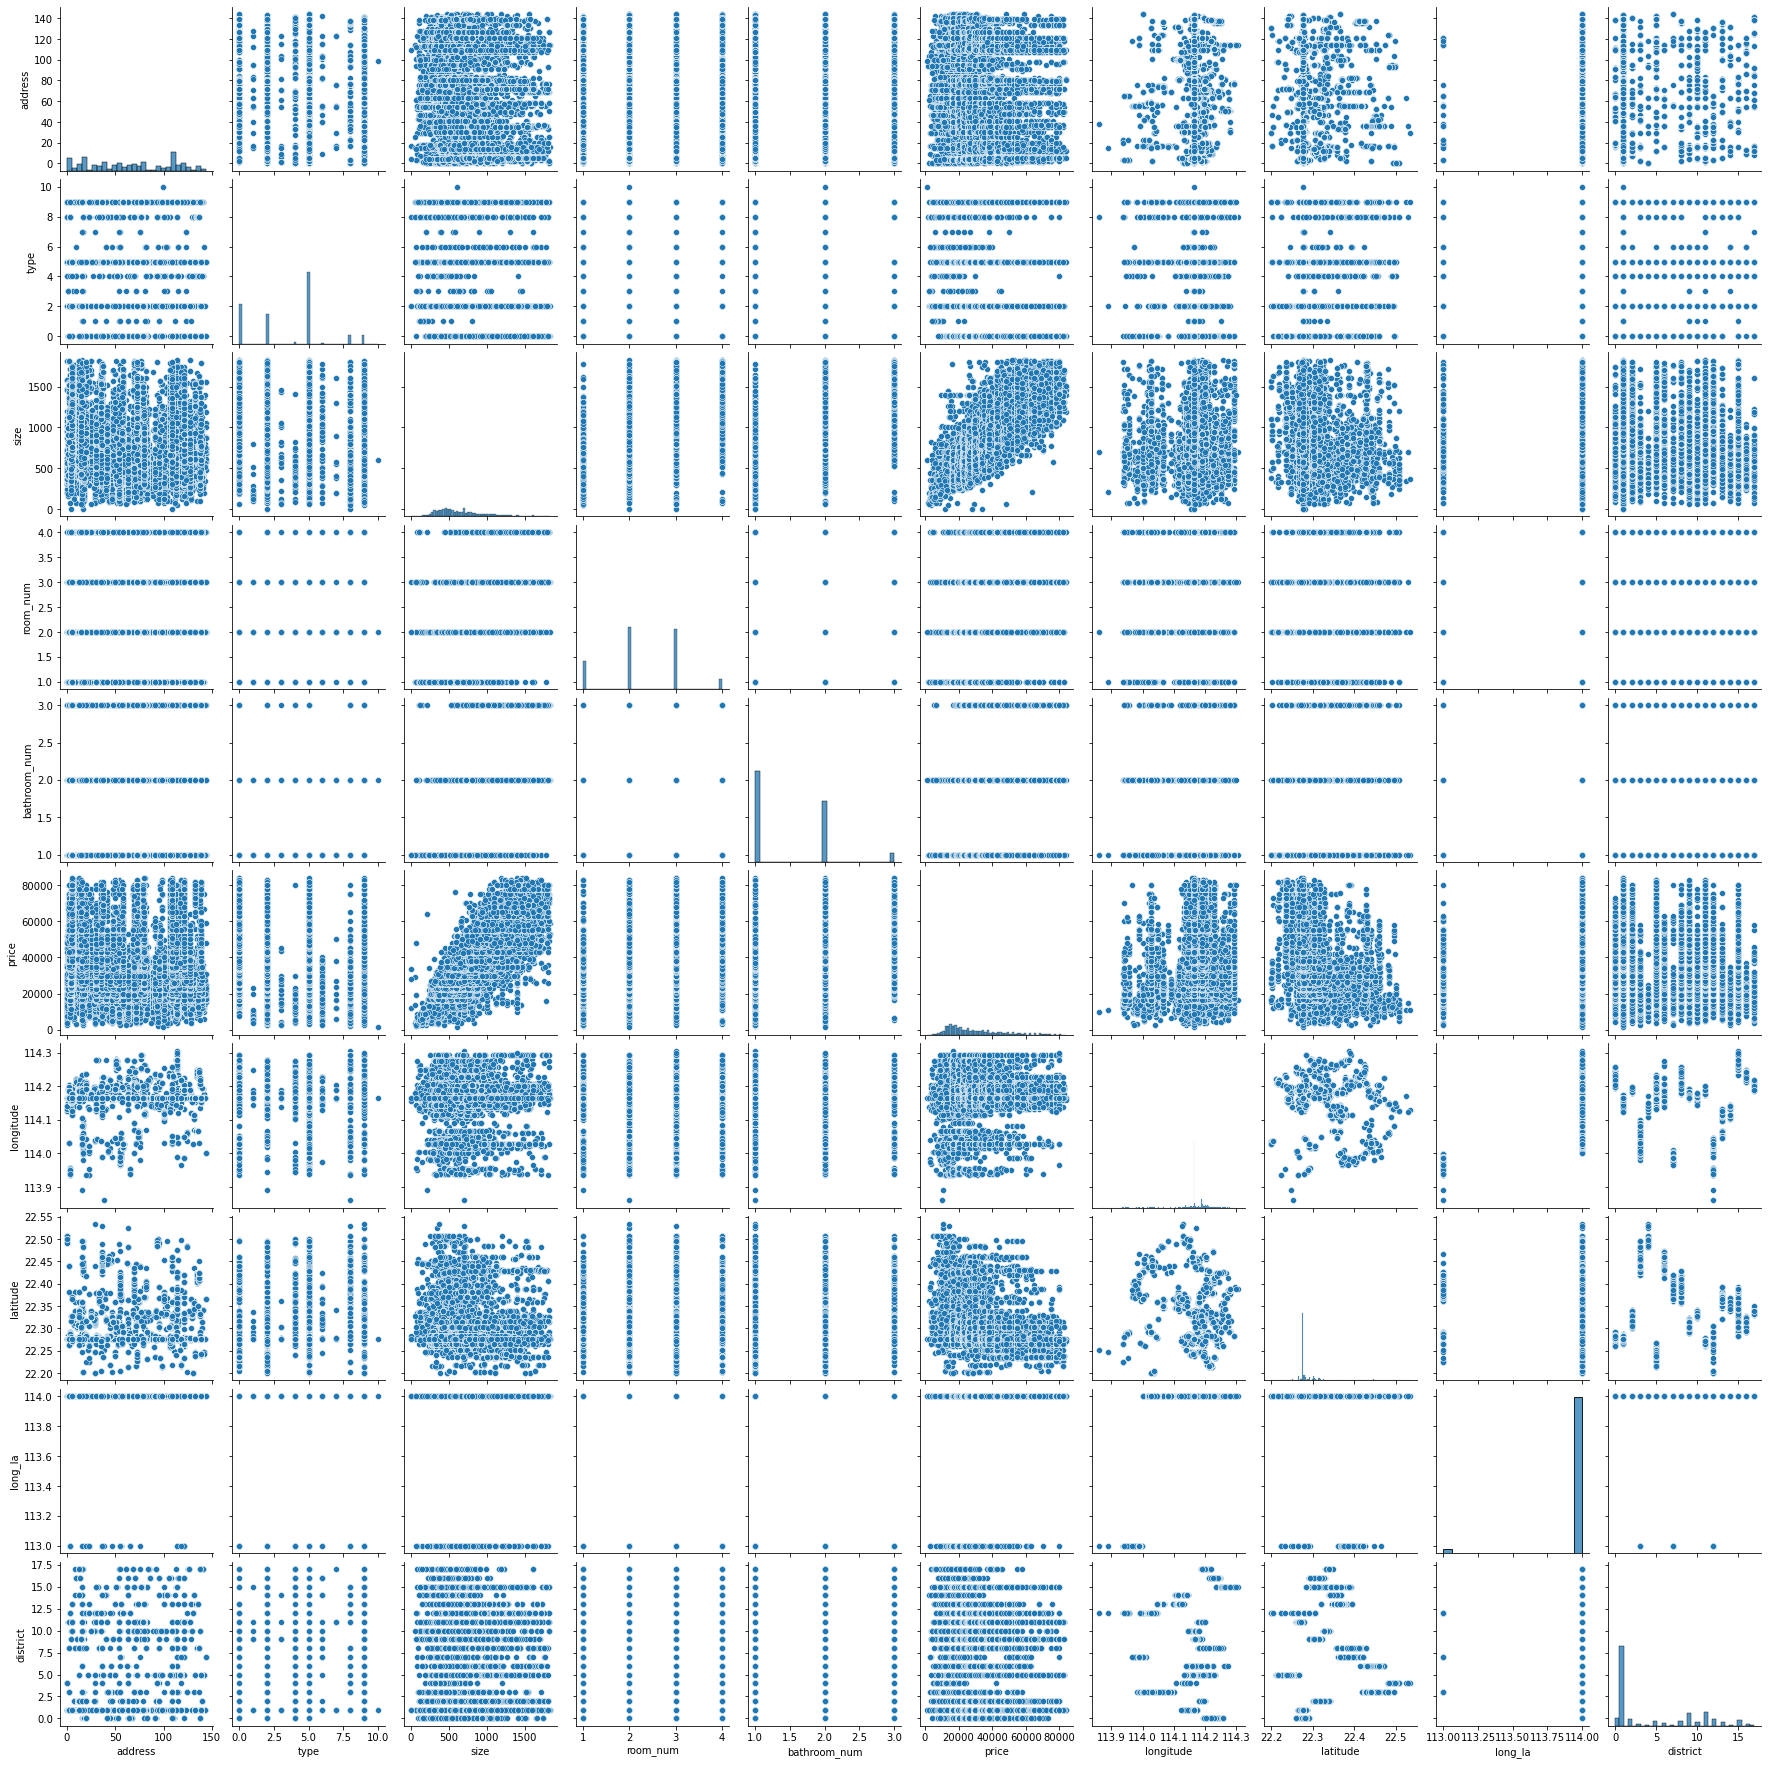

In [263]:
sns.pairplot(df2)
plt.show()

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [265]:
model=LinearRegression() #using df2 to do linear regression
print(df2.head())

   address  type  size  room_num  bathroom_num  price   longitude   latitude  \
0      128     5   506         2             1  21500  114.163825  22.276284   
1      104     5   480         2             1  15500  114.135727  22.360950   
2       65     5   643         3             2  18500  113.939633  22.280441   
3       36     5  1625         4             3  48000  114.163825  22.276284   
4       36     8   700         3             1  16500  114.163825  22.276284   

   long_la  district  
0    114.0         1  
1    114.0        14  
2    113.0        12  
3    114.0         1  
4    114.0         1  


In [266]:
#conver long_la's datatype from string float
df2['long_la']=list(map(lambda x:float('.'.join(str(x).split('.')[:-1])),df2['long_la']))
print(df2.head())

   address  type  size  room_num  bathroom_num  price   longitude   latitude  \
0      128     5   506         2             1  21500  114.163825  22.276284   
1      104     5   480         2             1  15500  114.135727  22.360950   
2       65     5   643         3             2  18500  113.939633  22.280441   
3       36     5  1625         4             3  48000  114.163825  22.276284   
4       36     8   700         3             1  16500  114.163825  22.276284   

   long_la  district  
0    114.0         1  
1    114.0        14  
2    113.0        12  
3    114.0         1  
4    114.0         1  


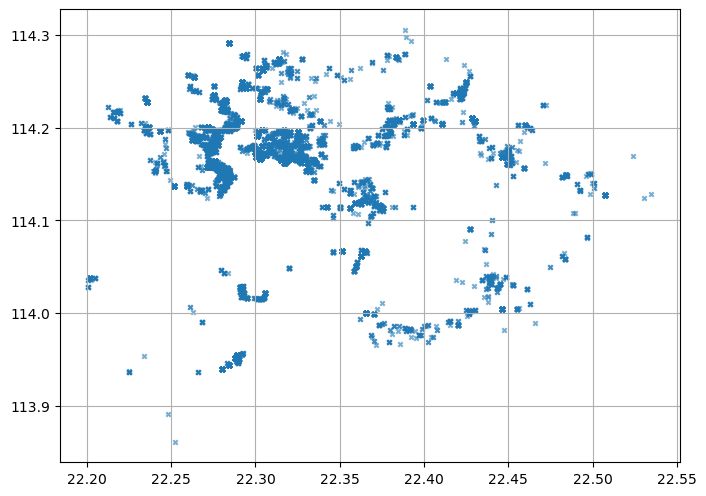

In [267]:
#Draw a scatter plot of latitude and longitude
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(df2['latitude'],df2['longitude'],s=10,marker='x',alpha=0.6)
plt.grid(True) #show grid lines
plt.show()

In [268]:
#Delineate features and labels
X,y=df2.drop(['price'],axis=1),df2['price']

In [269]:
#Normalization of features
sc_X=MinMaxScaler().fit_transform(X)

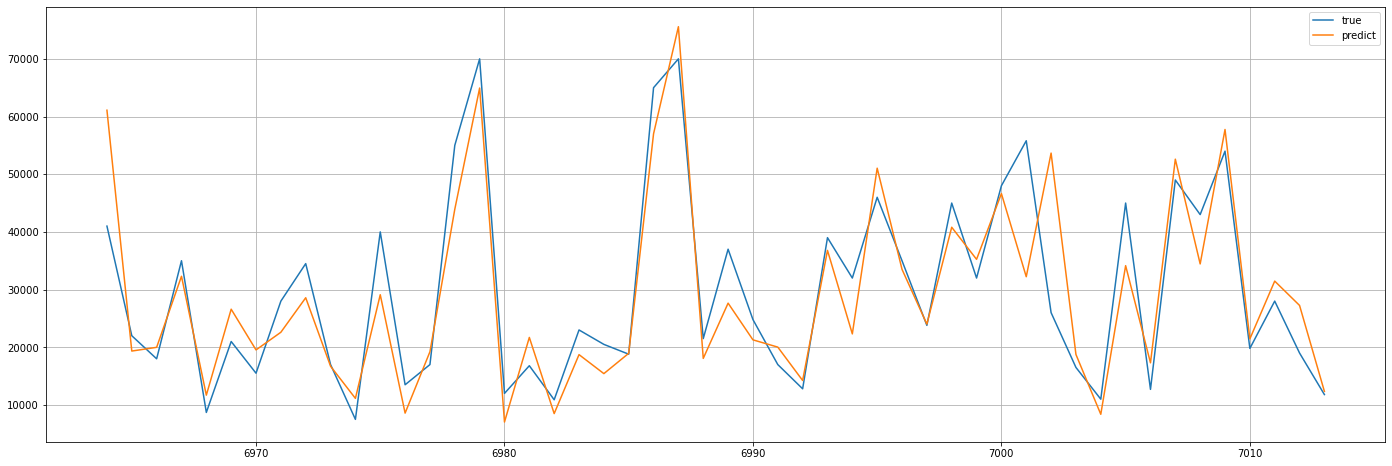

In [252]:
#Randomly divede data into training(75%) and test(25%) dataset
x_train,x_test,y_train,y_test=train_test_split(sc_X,y,test_size=0.25)
model.fit(x_train,y_train)#train the model with training dataset
predict=model.predict(x_test)#test the model with tset dataset

#visualizing the last 50 results to see if the model is good
plt.figure(figsize=(24,8))
plt.plot(range(len(y_test))[-50:],y_test[-50:],label='true')
plt.plot(range(len(y_test))[-50:],predict[-50:],label='predict')
plt.grid()
plt.legend()
plt.show()

In [253]:
#assesses the quality of a predictor by calculating r-squared, MSE, MAE and RMSE
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,predict)
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
print("r2 score:",r2)
print("MSE score:",mse)
print("MAE score:",mae)
print("RMSE score:",rmse)

r2 score: 0.8122979669312165
MSE score: 54876042.970791295
MAE score: 5416.435710638157
RMSE score: 7407.8365917986675
